In [1]:
import gc

import pandas as pd
import numpy as np

# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 16

In [2]:
df = pd.DataFrame({'日付':['2016-06-30','2016-09-30','2016-12-31', '2017-03-31','2017-06-30'],
                   '売上':[10,30,70,90,100]
                   })

df

,日付,売上
0,2016-06-30,10
1,2016-09-30,30
2,2016-12-31,70
3,2017-03-31,90
4,2017-06-30,100


## 日付のシリアル値を算出

In [3]:
def change_str_to_serial(day):
    '''文字列型の日付をシリアル値に変更する関数'''
    import datetime
    
    # 文字列を日付型に変換
    end_day = datetime.datetime.strptime(day, '%Y-%m-%d')
    start_day = datetime.datetime(1899, 12, 31)
    serial = end_day - start_day
    
    # 1900年3月1日以降は+1する必要があるらしい
    if end_day >= datetime.datetime(1900, 3, 1):
        return serial.days + 1
    else:
        return serial.days

In [4]:
df['日付(シリアル値)'] = df['日付'].map(lambda x: change_str_to_serial(x))

df

,日付,売上,日付(シリアル値)
0,2016-06-30,10,42551
1,2016-09-30,30,42643
2,2016-12-31,70,42735
3,2017-03-31,90,42825
4,2017-06-30,100,42916


In [5]:
df.dtypes

日付           object
売上            int64
日付(シリアル値)     int64
dtype: object

## 平均を算出

In [6]:
df['日付(シリアル値)_平均'] = df['日付(シリアル値)'].mean()
df['売上_平均'] = df['売上'].mean()

df

,日付,売上,日付(シリアル値),日付(シリアル値)_平均,売上_平均
0,2016-06-30,10,42551,42734.0,60.0
1,2016-09-30,30,42643,42734.0,60.0
2,2016-12-31,70,42735,42734.0,60.0
3,2017-03-31,90,42825,42734.0,60.0
4,2017-06-30,100,42916,42734.0,60.0


## 偏差を算出

In [7]:
df['日付(シリアル値)_偏差'] = df['日付(シリアル値)']-df['日付(シリアル値)_平均']
df['売上_偏差'] = df['売上']-df['売上_平均']

df

,日付,売上,日付(シリアル値),日付(シリアル値)_平均,売上_平均,日付(シリアル値)_偏差,売上_偏差
0,2016-06-30,10,42551,42734.0,60.0,-183.0,-50.0
1,2016-09-30,30,42643,42734.0,60.0,-91.0,-30.0
2,2016-12-31,70,42735,42734.0,60.0,1.0,10.0
3,2017-03-31,90,42825,42734.0,60.0,91.0,30.0
4,2017-06-30,100,42916,42734.0,60.0,182.0,40.0


## 2変数の偏差を掛けた値を算出

In [8]:
df['日付(シリアル値)_偏差×売上_偏差'] = df['日付(シリアル値)_偏差']*df['売上_偏差']

df

,日付,売上,日付(シリアル値),日付(シリアル値)_平均,売上_平均,日付(シリアル値)_偏差,売上_偏差,日付(シリアル値)_偏差×売上_偏差
0,2016-06-30,10,42551,42734.0,60.0,-183.0,-50.0,9150.0
1,2016-09-30,30,42643,42734.0,60.0,-91.0,-30.0,2730.0
2,2016-12-31,70,42735,42734.0,60.0,1.0,10.0,10.0
3,2017-03-31,90,42825,42734.0,60.0,91.0,30.0,2730.0
4,2017-06-30,100,42916,42734.0,60.0,182.0,40.0,7280.0


## 偏差の2乗値を算出

In [9]:
df['日付(シリアル値)_偏差_2乗'] = df['日付(シリアル値)_偏差']**2
df['売上_偏差_2乗'] = df['売上_偏差']**2

df

,日付,売上,日付(シリアル値),日付(シリアル値)_平均,売上_平均,日付(シリアル値)_偏差,売上_偏差,日付(シリアル値)_偏差×売上_偏差,日付(シリアル値)_偏差_2乗,売上_偏差_2乗
0,2016-06-30,10,42551,42734.0,60.0,-183.0,-50.0,9150.0,33489.0,2500.0
1,2016-09-30,30,42643,42734.0,60.0,-91.0,-30.0,2730.0,8281.0,900.0
2,2016-12-31,70,42735,42734.0,60.0,1.0,10.0,10.0,1.0,100.0
3,2017-03-31,90,42825,42734.0,60.0,91.0,30.0,2730.0,8281.0,900.0
4,2017-06-30,100,42916,42734.0,60.0,182.0,40.0,7280.0,33124.0,1600.0


#### 合計を算出(念のため)

In [10]:
tmp = df.copy()

# 日付列以外の列の合計を算出
sum_df = pd.DataFrame({'合計':tmp.iloc[:,1:].sum()})

# 上記データフレームを転置
df0 = sum_df.T.reset_index().rename(columns={'index':'日付'})

df1 = pd.concat([df,df0], ignore_index=True)

df1

,日付,売上,日付(シリアル値),日付(シリアル値)_平均,売上_平均,日付(シリアル値)_偏差,売上_偏差,日付(シリアル値)_偏差×売上_偏差,日付(シリアル値)_偏差_2乗,売上_偏差_2乗
0,2016-06-30,10.0,42551.0,42734.0,60.0,-183.0,-50.0,9150.0,33489.0,2500.0
1,2016-09-30,30.0,42643.0,42734.0,60.0,-91.0,-30.0,2730.0,8281.0,900.0
2,2016-12-31,70.0,42735.0,42734.0,60.0,1.0,10.0,10.0,1.0,100.0
3,2017-03-31,90.0,42825.0,42734.0,60.0,91.0,30.0,2730.0,8281.0,900.0
4,2017-06-30,100.0,42916.0,42734.0,60.0,182.0,40.0,7280.0,33124.0,1600.0
5,合計,300.0,213670.0,213670.0,300.0,0.0,0.0,21900.0,83176.0,6000.0


## 共分散を算出
(xの偏差×yの偏差)の平均

In [12]:
# 1
# どちらでも同じ
#covariance = df['日付(シリアル値)_偏差×売上_偏差'].sum() / df.shape[0]
covariance = df['日付(シリアル値)_偏差×売上_偏差'].mean()

covariance

4380.0

In [13]:
# 2
np.cov(df['日付(シリアル値)'],df['売上'], ddof=0)

array([[16635.2,  4380. ],
       [ 4380. ,  1200. ]])

## 相関係数を算出
xとyの共分散÷(xの標準偏差*yの標準偏差)

In [14]:
# 1
correlation =\
df['日付(シリアル値)_偏差×売上_偏差'].mean() / (np.sqrt(df['日付(シリアル値)_偏差_2乗'].mean())*np.sqrt(df['売上_偏差_2乗'].mean()))

correlation

0.9803236368717841

In [15]:
# 2
np.cov(df['日付(シリアル値)'],df['売上'], ddof=0)[0,1] / (np.std(df['日付(シリアル値)'])*np.std(df['売上']))

0.9803236368717841

In [16]:
# 3
df['日付(シリアル値)'].corr(df['売上'])

0.9803236368717841

In [79]:
df10 = pd.DataFrame({'日付':['2016-06-30','2016-09-30','2016-12-31', '2017-03-31','2017-06-30'],
                   '売上':[10,50,20,20,100]
                   })

df10['日付(シリアル値)'] = df10['日付'].map(lambda x: change_str_to_serial(x))

df10

,日付,売上,日付(シリアル値)
0,2016-06-30,10,42551
1,2016-09-30,50,42643
2,2016-12-31,20,42735
3,2017-03-31,20,42825
4,2017-06-30,100,42916


In [80]:
df10['日付(シリアル値)'].corr(df10['売上'])

0.6445473155274928

In [81]:
round(df10['日付(シリアル値)'].corr(df10['売上']), 2)

0.64

## 可視化

!pip install japanize-matplotlib

In [19]:
import japanize_matplotlib

Text(0.5, 1.0, '相関係数:0.98')

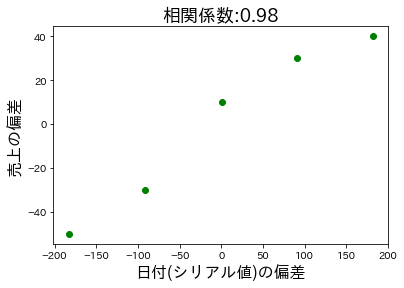

In [84]:
fig, ax = plt.subplots()
ax.scatter(df['日付(シリアル値)_偏差'],df['売上_偏差'], color='g')
ax.set_xlabel('日付(シリアル値)の偏差',fontsize=16)
ax.set_ylabel('売上の偏差',fontsize=16)
ax.set_title('相関係数:{}'.format(round(df['日付(シリアル値)'].corr(df['売上']),2)) ,fontsize=18)

In [82]:
df10['日付(シリアル値)_平均'] = df10['日付(シリアル値)'].mean()
df10['売上_平均'] = df10['売上'].mean()
df10['日付(シリアル値)_偏差'] = df10['日付(シリアル値)']-df10['日付(シリアル値)_平均']
df10['売上_偏差'] = df10['売上']-df10['売上_平均']

Text(0.5, 1.0, '相関係数:0.64')

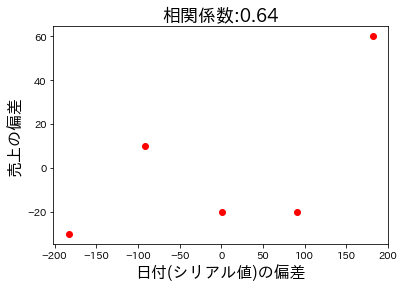

In [85]:
fig, ax = plt.subplots()
ax.scatter(df10['日付(シリアル値)_偏差'],df10['売上_偏差'], color='r')
ax.set_xlabel('日付(シリアル値)の偏差',fontsize=16)
ax.set_ylabel('売上の偏差',fontsize=16)
ax.set_title('相関係数:{}'.format(round(df10['日付(シリアル値)'].corr(df10['売上']),2)) ,fontsize=18)

## 可視化まとめ

In [86]:
usecols=['日付', '売上', '日付(シリアル値)','日付(シリアル値)_偏差','売上_偏差']
v_df = df[usecols]
v_df10 = df10[usecols]
display(v_df, v_df10)

,日付,売上,日付(シリアル値),日付(シリアル値)_偏差,売上_偏差
0,2016-06-30,10,42551,-183.0,-50.0
1,2016-09-30,30,42643,-91.0,-30.0
2,2016-12-31,70,42735,1.0,10.0
3,2017-03-31,90,42825,91.0,30.0
4,2017-06-30,100,42916,182.0,40.0


,日付,売上,日付(シリアル値),日付(シリアル値)_偏差,売上_偏差
0,2016-06-30,10,42551,-183.0,-30.0
1,2016-09-30,50,42643,-91.0,10.0
2,2016-12-31,20,42735,1.0,-20.0
3,2017-03-31,20,42825,91.0,-20.0
4,2017-06-30,100,42916,182.0,60.0


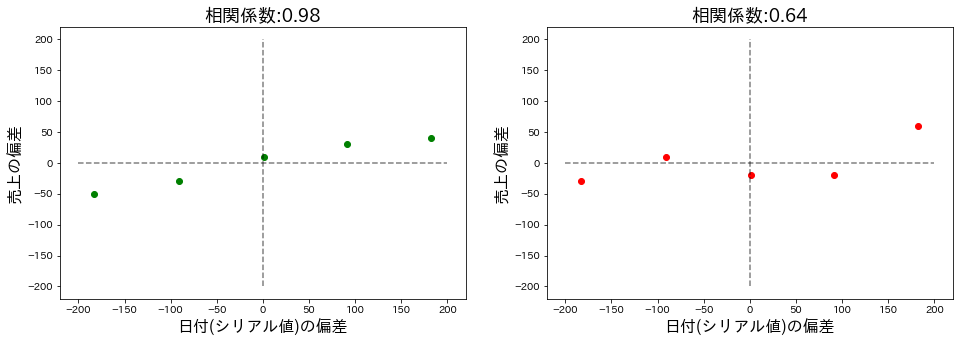

In [91]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16, 5))

ax[0].scatter(df['日付(シリアル値)_偏差'],df['売上_偏差'], color='g')
ax[0].set_xlabel('日付(シリアル値)の偏差',fontsize=16)
ax[0].set_ylabel('売上の偏差',fontsize=16)
ax[0].set_title('相関係数:{}'.format(round(df['日付(シリアル値)'].corr(df['売上']),2)) ,fontsize=18)
ax[0].hlines(0, xmin=-200, xmax=200,linestyles='dashed',alpha=0.5)
ax[0].vlines(0, ymin=-200, ymax=200,linestyles='dashed',alpha=0.5)

ax[1].scatter(df10['日付(シリアル値)_偏差'],df10['売上_偏差'], color='r')
ax[1].set_xlabel('日付(シリアル値)の偏差',fontsize=16)
ax[1].set_ylabel('売上の偏差',fontsize=16)
ax[1].set_title('相関係数:{}'.format(round(df10['日付(シリアル値)'].corr(df10['売上']),2)) ,fontsize=18)
ax[1].hlines(0, xmin=-200, xmax=200,linestyles='dashed',alpha=0.5)
ax[1].vlines(0, ymin=-200, ymax=200,linestyles='dashed',alpha=0.5)

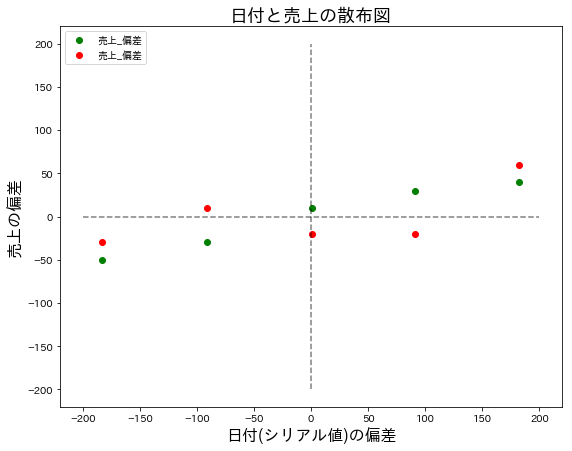

In [98]:
fig, ax = plt.subplots(figsize=(9, 7))
ax.scatter(df['日付(シリアル値)_偏差'],df['売上_偏差'], color='g')
ax.scatter(df10['日付(シリアル値)_偏差'],df10['売上_偏差'], color='r')

ax.set_xlabel('日付(シリアル値)の偏差',fontsize=16)
ax.set_ylabel('売上の偏差',fontsize=16)
ax.set_title('日付と売上の散布図' ,fontsize=18)
ax.legend(loc='upper left')
ax.hlines(0, xmin=-200, xmax=200,linestyles='dashed',alpha=0.5)
ax.vlines(0, ymin=-200, ymax=200,linestyles='dashed',alpha=0.5)